## Why validate?  Need a way to help maybe...
1. Choose best parameter
2. Choose best model
3. Choose best features

### Note: Cross validation works with both regression and classification models.



1. We know that using ENTIRE TRAINING data to build a model is NOT good
2. TRAIN/TEST split is better but also, not that great! For example, you can change random_state to get the best accuracy score on your TRAINING data but how will this impact PREDICTING your REAL data??
3.  Hence, CROSS VALIDATION! (create a bunch of train/test splits, avg the score)

## Most common type of cross validation - K FOLD cross validation. 


#### Comparing train/test split to cross_validation
1. More accurate estimate for out-of-sample accuracy
2. More efficient use of data (every observatio is used for training and testing)

#### Advantages of train/test split
1.  Runs faster 
2. Simplier to examine the detailed results of the testing process

## Cross validation recommendations
1. k=10 is generally recommended
2. For CLASSIFICATION problems, STRATIFIED SAMPLING is recommended for creating the folds (sklearn cross_val_score function does this by default)

## Cross validation example for PARAMETER TUNING (for choosing which types of model, check out section below).
1. We are using KNN model
2.  We are fine tuning the k in KNN (NOT the k in k-fold cross validation)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
iris = load_iris()
X = iris.data 
y= iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [10]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
y_predicted_knn5 = knn5.predict(X_test)
print("Training accuracy KNN5 (% of predictions that were correct) is:", metrics.accuracy_score(y_test, y_predicted_knn5))

Training accuracy KNN5 (% of predictions that were correct) is: 0.9736842105263158


In [13]:
from sklearn.model_selection import cross_val_score

In [18]:
# Testing 10 fold cross validation with k=5 in KNN model
# Note #1:  We are passing ALL of X and y into cross_val_score, not X_train and y_train
#            cross_val_score does the splitting for you into FOLDS so you don't have to do train/test split
# Note #2: cv = 10 is the number of folds being passed into cross_validation
# Note #3:  We want to use CLASSIFICATION ACCURACY as the evaluation metric
# http://scott.fortmann-roe.com/docs/MeasuringError.html

knn5 = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn5, X, y, cv=10, scoring="accuracy")
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


#### What does cross_val_score FUNCTION actually do and what does it return?  Basically, it executes the first 4 steps of Kfold_cross_validation which are:

1. Split the dataset into K equal partitions/folds
2. Use 1 fold as the testing set and the UNION of the other folds as the training set
3. Calculate testing accuracy 
4. Repeats steps 2 and 3 for K times
5. Calculates the AVERAGE testing accuracy as the estimate of out-of-sample accuracy.


#### When done calculating, it will return the K accuracy scores as a numpy array.


In [23]:
# Use the average accuracy as an estimate of out-of-sample accuracy


print("Avg for k=10 (10 fold) is: ", scores.mean())

Avg for k=10 (10 fold) is:  0.9666666666666668


#### Because we used KFold_cross_validation, we should be MORE CONFIDENT that this model is more accurate for out-of-sample accuracy.

#### Let's loop through a range of k for KNN and find the best knn k value using KFOLD.


In [26]:
# Searching the optimal k value for KNN model

knn_range = range(1,31)
knn_scores = []
for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    knn_scores.append(scores.mean())
    
print(knn_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Accuracy score')

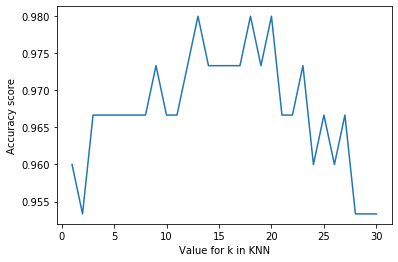

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(knn_range, knn_scores)
plt.xlabel("Value for k in KNN")
plt.ylabel("Accuracy score")

#### Some observation when reviewing the matplotlib chart (btw,  OPTIMUM K value for KNN is 20):

1. The maximum cross validated accuracy occurs at K equals 13 to 20
2. The general shape of the curve is an UPSIDE DOWN u shape, which is quite typical when examining the relationship between a model complexity parameter and model accuracy.
3. BIAS variance tradeoff: low values of K (KNN) produce a model of low bias and high variance.  High values of K produces a model with high bias and low variance.  The best model is found in the middle because it appropriately balances bias and variance and thus is most likely to generalize out-of-sample data. When deciding which exact value of K to call the best, it is generally recommended to choose the LEAST COMPLICATED COMPLICATED MODEL.  In this KNN model, higher K values produces simplier models, so in this case, the OPTIMUM K value for KNN is 20.


#### CONCLUSION!  So here,  OPTIMUM K value for KNN model is 20.

## Cross validation example for choosing different types of models (in this example, we will decide between KNN and Logistic Regression).

In [28]:
# Run 10-fold-cross-validation for KNN model
knn = KNeighborsClassifier(n_neighbors = 20)
knn_scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
knn_scores.mean()

0.9800000000000001

In [31]:
# Run 10-fold-cross-validation for Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg, X, y, cv=10, scoring="accuracy")
logreg_scores.mean()

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

0.9733333333333334

#### CONCLUSION!  So here, you could conclude that KNN is a better choice.


## Cross validation example for choosing different features.  Some notes:
1. Goal here is to see whether to adding NEWSPAPAER feature in linear regression to help predict Sales in advertising dataset.
2. We don't have the advertising dataset in a csv file, so all code has been commented out.

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [33]:
# Step #1 - Read in csv

# df = pd.read_csv("advertising.csv", index_col=0)

In [34]:
# Step #2 - create feature columns

# feature_cols = df[["TV", "Radio", "Newspaper"]]
# X = data[feature_cols]
# y = data.Sales

In [45]:
# Step #3 - Instantiate linear regression model. Note we changed the scoring to MEAN_SQUARED_ERROR.  Accuracy is only
#           relevant for classification problems.  
# Note1 - We actually want to use ROOT MEAN SQUARED ERROR but that is not available via the scoring parameter,
#         so will instead use MSE, then later, take the square root.
# Note2 - MSE is a loss function which you want to MINIMIZE!
# Note3 - You may see negative scores below (Sklearn decided to leave neg # alone so you know its the worst number for
#         selection purposes.  Hope this makes sense.)  That's why you may have to make it positive. This may
#         have changed with NEWER versions of sklearn
# Note4 - ROOT mean squared error is something you want to MINIMIZE.  So the small rmse is, the better!

# linearR = LinearRegression()
# scores = cross_val_score(linearR, X, y, cv=10, scoring="mean_squared_error")
# print(scores)

In [41]:
# Step #4 - Make it positive

# mse_scores = -scores

In [42]:
# Step #5 - calculate ROOT MEAN SQUARED ERROR

# rmse_scores = np.sqrt(mse_scores)

In [43]:
# Step #6 - calculate the MEAN of rmse

# avg_rmse = rmse_scores.mean()

#### Now, repeat this process with NEWSPAPER EXCLUDED!!  Compare the avg_rmse for both.

In [44]:
# feature_cols = df[["TV", "Radio"]]
# X = data[feature_cols]
# without_newspaper = np.sqrt(-cross_val_score(linearR, X, y, cv=10, scoring="mean_squared_error")).mean()

#### CONCLUSION!  You want RMSE to be smaller.  So the model (maybe WITHOUT newspaper as a feature) that gives the SMALLER RMSE should be the BETTER model.  

## HOW TO IMPROVE CROSS VALIDATION?
#### Repeated cross validation
1. Repeated cross validation by manipulating the test_size split
2. Reducing the variance (?)

####  Creating a HOLD OUT set

1. Take out some of the data (like a test/split from the test/split)

#### Feature engineering and selection within EACH cross-validation iteration
